<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" style="width:200px; float:right"></img>

## Test A/B del videojuego Cookie Cats
Tomamos como ejemplo el test A/B del videojuego Cookie Cats ofrecido por <a href="https://www.datacamp.com/">datacamp.com</a>. <a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> es un juego de rompecabezas desarrollado por <a href="http://tactile.dk">Tactile Entertainment</a>, en el que el jugador debe conectar fichas del mismo color para despejar el tablero y ganar el nivel.</p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>A medida que los jugadores avanzan por los niveles del juego, ocasionalmente encontrarán puertas que los obligarán a esperar una cantidad de tiempo o realizar una compra en la aplicación para progresar. Además de impulsar las compras en la aplicación, estas puertas cumplen el importante propósito de brindar a los jugadores un descanso forzado del juego, con la esperanza de que el disfrute del juego por parte del jugador aumente y se prolongue.</p>
<p><img src="https://assets.datacamp.com/production/project_184/img/cc_gates.png" alt></p>
<p>Pero, ¿dónde deben colocarse las puertas? Inicialmente, la primera puerta se colocó en el nivel 30, pero en este cuaderno analizaremos una prueba AB en la que movimos la primera puerta en Cookie Cats del nivel 30 al nivel 40. En particular, veremos el impacto en retención de jugadores. Pero antes de llegar a eso, un paso clave antes de emprender cualquier análisis es comprender los datos. ¡Así que vamos a cargarlo y echar un vistazo!</p>

In [ ]:
# Importing pandas
import pandas as pd

# Reading in the data
df = pd.read_csv('https://raw.githubusercontent.com/alegalesi/cookiecats/main/cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Los datos
<p>Los datos que tenemos son de 90.189 jugadores que instalaron el juego mientras se ejecutaba la prueba AB. Las variables son:</p>
<ul>
<li><code>userid</code> - un número único que identifica a cada jugador.</li>
<li><code>version</code> - si el jugador está en el grupo de control (<code>gate_30</code> - puerta al nivel 30) o en el grupo de tratamiento (<code>gate_40</code> - puerta al nivel 40).</li>
<li><code>sum_gamerounds</code> - el número de partidos jugados por el jugador durante la primera semana después de la instalación.</li>
<li><code>retention_1</code> - indicador = 1 si el jugador ha vuelto a jugar <strong>1 día</strong> después de la instalación.</li>
<li><code>retention_7</code> - indicador = 1 si el jugador ha vuelto a jugar <strong>7 días</strong> después de la instalación.</li>
</ul>
<p>Cuando un jugador instalaba el juego, se le asignaba aleatoriamente a <code>gate_30</code> o <code>gate_40</code>. Como prueba, veamos si hay aproximadamente la misma cantidad de jugadores en cada grupo.</p>

In [ ]:
# Counting the number of players in each AB group.
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


## La distribución de partidos
<p><img src="https://assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:200px; float:left"> </p>
<p>Parece que hay aproximadamente la misma cantidad de jugadores en cada grupo, ¡bien!</p>
<p>Exploramos los datos. Por ejemplo analizamos la distribución de la cantidad de partidos que los jugadores jugaron durante su primera semana de juego.</p>

Text(0, 0.5, 'Número de usuarios')

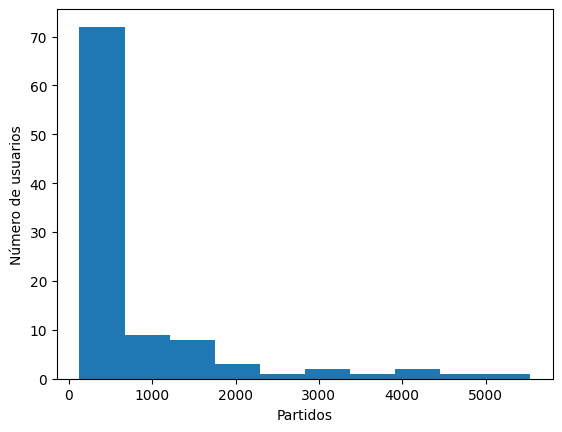

In [ ]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of game rounds
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(n=100).plot(x="sum_gamerounds", y="userid", kind="hist")
ax.set_xlabel("Partidos")
ax.set_ylabel("Número de usuarios")

## Retención
<p>En el gráfico de arriba podemos ver que algunos jugadores solo juegan un par de rondas de juego en su primera semana, ¡y algunos quedan realmente enganchados! Lo que queremos es que a los jugadores les guste el juego y se enganchen. Una métrica común en la industria de los videojuegos para determinar qué tan divertido y atractivo es un juego es la <strong>retención</strong>:
    
 - <em>retención de un día</em>: el porcentaje de jugadores que regresa y juega el juego <em>un día</em> después de haberlo instalado.
 - <em>retención de 7 días</em>: el porcentaje de jugadores que regresa y juega el juego <em>7 días</em> después de haberlo instalado.
    
<p>Cuanto mayor sea la retención, más fácil será retener a los jugadores y construir una gran base de jugadores. Como primer paso, observamos la retención media en la muestra </p>

In [ ]:
print('La retención de un día es {:2.2%}'.format(df['retention_1'].sum()/df['retention_1'].count()))

print('La retención de siete días es {:2.2%}'.format(df['retention_7'].sum()/df['retention_7'].count()))

La retención de un día es 44.52%
La retención de siete días es 18.61%


## Test A/B de la retención de 1 día
<p><img src="https://assets.datacamp.com/production/project_184/img/belle_cookie.png" style="width:200px; float:right"> </p>
<p>Un poco menos de la mitad de los jugadores  (44,5%) regresan un día después de instalar el juego, y solo uno sobre cinco (18,6%) regresan después de siete días. Ahora que tenemos un punto de referencia, veamos cómo difiere la retención entre los grupos de control y tratamiento. Empezamos por la retención de un día:</p>

In [ ]:
# Calculating 1-day retention for each AB-group
100*df.groupby('version')['retention_1'].sum()/df.groupby('version')['retention_1'].count()

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64

## Test A/B de la retención de 7 días
<p>Hay menos retención de 1 día cuando la puerta está al nivel 40 (44,2%) en comparación con el control, que tiene la puerta en el nivel 30 (44,8%). Es un cambio pequeño, pero incluso los pequeños cambios en la retención pueden tener un gran impacto.<p>
    
<p>El resultado nos dice que la retención de 1 día sea mejor cuando la puerta está en el nivel 30. Sin embargo, dado que los jugadores solo han estado jugando durante un día, es probable que la mayoría de los jugadores no hayan aún alcanzado el nivel 30. Es decir, muchos jugadores no se habrán visto afectados por la puerta, incluso si es tan pronto como en el nivel 30.</p>    

<p>Pero después de haber jugado durante una semana, más jugadores deberían haber alcanzado el nivel 40 y, por lo tanto, tiene sentido considerar también la retención de 7 días, que mide el porcentaje de las personas que instalaron el juego y que se presentaron una semana después para volver a jugarlo.</p>
<p>Empecemos por calcular la retención de 7 días para los dos grupos.</p>

In [ ]:
# Calculating 7-day retention for both AB-groups
100*df.groupby('version')['retention_7'].sum()/df.groupby('version')['retention_7'].count()

version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64

## Conclusiones
<p>El resultado nos dice que existe evidencia de que la retención de 7 días es mayor cuando la puerta está en el nivel 30 (19,0%) que cuando está en el nivel 40 (18,2%). La conclusión es: si queremos mantener una retención alta, <strong>no</strong> debemos mover la puerta del nivel 30 al nivel 40.</p>
<p><img src="https://assets.datacamp.com/production/project_184/img/cookie_yellow.png" style="width:100px; float:center"> </p>

<p>Entonces, ¿por qué la retención es mayor cuando la puerta se coloca antes? Uno podría esperar lo contrario: cuanto más tarde el obstáculo, más tiempo se involucrará la gente en el juego. Pero esto no es lo que nos dicen los datos. La teoría de la <em>adaptación hedónica</em> puede dar una explicación para esto. En resumen, la adaptación hedónica es la tendencia de las personas a disfrutar cada vez menos de una actividad divertida con el tiempo si esa actividad se realiza de forma continua. Al obligar a los jugadores a tomar un descanso cuando llegan a una puerta, se prolonga su disfrute del juego. Pero cuando la puerta se mueve al nivel 40, menos jugadores llegan lo suficientemente lejos y es más probable que abandonen el juego porque simplemente se aburrieron.</p>

## Extra

<p>Nota: Hay, por supuesto, otras métricas que podríamos ver, como la cantidad de partidos jugados, <code>sum_gamerounds</code>, se deja como ejercicio.</p>    